In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('new_cook_corr.csv')

In [3]:
X = data.iloc[:,2:7].values
y = data.iloc[:,7].values

In [4]:
X, y

(array([[ 1.6  ,  2.3  ,  0.187,  6.56 ,  3.52 ],
        [ 1.6  ,  2.3  ,  0.187,  6.56 ,  3.82 ],
        [ 1.4  ,  2.15 ,  0.087,  6.83 , 13.72 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 , 12.55 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 , 18.91 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 ,  6.35 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 , 19.06 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 ,  5.72 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 , 19.34 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 , 12.7  ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 , 19.64 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 , 19.98 ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 , 13.2  ],
        [ 1.4  ,  2.15 ,  0.08 ,  6.82 ,  6.42 ],
        [ 1.35 ,  2.05 ,  0.53 ,  6.75 , 13.71 ],
        [ 1.35 ,  2.05 ,  0.53 ,  6.75 , 19.65 ],
        [ 1.35 ,  2.05 ,  0.53 ,  6.75 ,  3.36 ],
        [ 1.35 ,  2.05 ,  0.53 ,  6.75 ,  3.68 ],
        [ 1.4  ,  2.05 ,  0.67 ,  6.76 , 20.25 ],
        [ 1.4  ,  2.05 ,  0.67 ,  6.76 , 19.68 ],


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=1)

In [6]:
params = {'n_estimators': np.arange(1,500,1),'max_depth':np.arange(1,20,1),'learning_rate':[0.1]}
search = GridSearchCV(GradientBoostingRegressor(), param_grid = params, cv = 5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True )

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
cv = KFold(n_splits=5, shuffle=True, random_state=1)
for train, test in cv.split(X_train, y_train):
    search.fit(X_train[train],y_train[train])
search.best_params_

Fitting 5 folds for each of 9481 candidates, totalling 47405 fits
Fitting 5 folds for each of 9481 candidates, totalling 47405 fits
Fitting 5 folds for each of 9481 candidates, totalling 47405 fits
Fitting 5 folds for each of 9481 candidates, totalling 47405 fits
Fitting 5 folds for each of 9481 candidates, totalling 47405 fits


{'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 154}

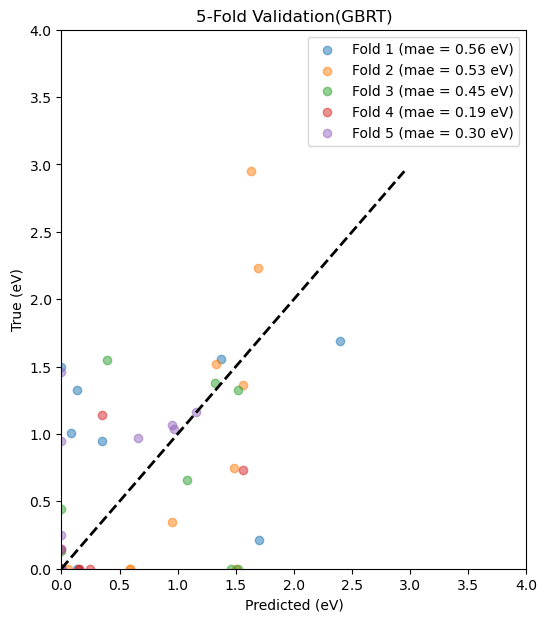

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
model =  GradientBoostingRegressor(n_estimators=154, max_depth=16, learning_rate=0.1)
scores = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)
fig = plt.figure(figsize=(6,7))
i = 1
for train, test in cv.split(X_train, y_train):
    model.fit(X_train[train],
                 y_train[train])
    prediction = abs(model.predict(X_train[test]))
    true = y_train[test]
    score = mean_absolute_error(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=1, alpha=0.5, 
                label='Fold %d (mae = %0.2f eV)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted (eV)')
plt.ylabel('True (eV)')
plt.title('5-Fold Validation(GBRT)')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()
plt.savefig('newGBRT_5foldVal.png')
plt.show()


In [11]:
params = {'n_estimators': np.arange(1,500,1),'max_depth':np.arange(1,20,1),'learning_rate':[0.1]}
search = GridSearchCV(GradientBoostingRegressor(), param_grid = params, cv = 5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True )
search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 9481 candidates, totalling 47405 fits


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 33}

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
reg = GradientBoostingRegressor(n_estimators=33, max_depth=7, learning_rate=0.1)
reg.fit(X_train,y_train)
y_pred = abs(reg.predict(X_test))
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [13]:
mse, mae, rmse

(0.11788487788964695, 0.27098005283570015, 0.34334367314637815)